In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
years_loc = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

In [10]:
# Import data, drop LTC, set index as pd_datetime and include only data starting from May 2017
prices = pd.read_csv("data_cc_daily_prices.csv", index_col = 0, usecols = lambda x: x!='LTC')
prices.index = pd.to_datetime(prices.index)
returns = pd.read_csv("data_cc_daily_log_returns.csv", index_col = 0, usecols = lambda x: x!='LTC')
returns.index = pd.to_datetime(returns.index)
# Monthly aggregated data
mprices = prices.resample('M').mean()
mreturns = returns.resample('M').mean()

In [11]:
price_data_vix = [prices["2017-05-01":], mprices["2017-05-31":]]
price_data = [prices["2017-05-01":].drop("VIX", 1), mprices["2017-05-31":].drop("VIX", 1)]
returns_data_vix = {"daily": returns["2017-05-01":], "monthly": mreturns["2017-05-31":]}
returns_data = {"daily": returns["2017-05-01":].drop("VIX", 1), "monthly": mreturns["2017-05-31":].drop("VIX", 1)}

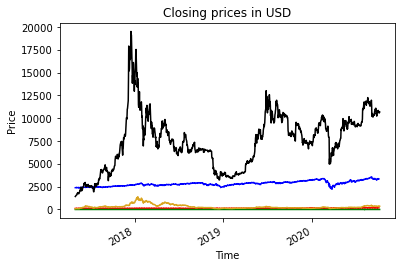

<Figure size 432x288 with 0 Axes>

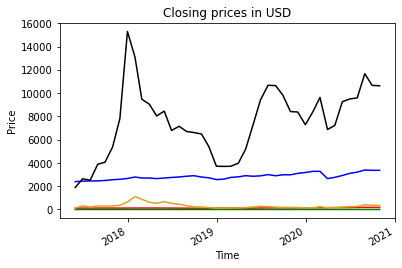

<Figure size 432x288 with 0 Axes>

In [29]:
# Closing prices
for data in price_data:
    ax = data.plot(x_compat=True, legend=False, color=['r' ,'g', 'goldenrod', 'b', 'k'])
    ax.set_title("Closing prices in USD")
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.xaxis.set_major_locator(years_loc)
    ax.xaxis.set_major_formatter(years_fmt)
    plt.show()
    plt.savefig("plot.pdf")

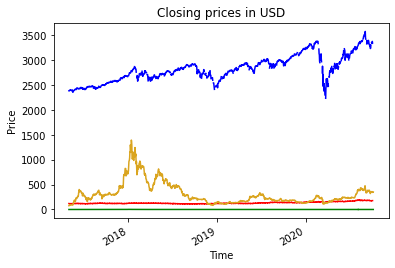

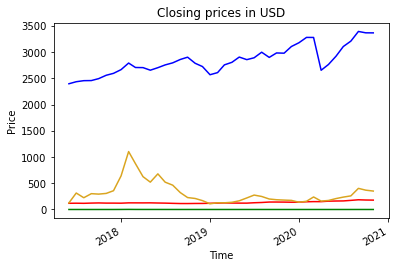

In [30]:
# Closing prices excluding BTC
for data in price_data:
    ax = data.drop(columns=['BTC']).plot(legend=False, x_compat=True, color=['r', 'g', 'goldenrod', 'b'])
    ax.set_title("Closing prices in USD")
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.xaxis.set_major_locator(years_loc)
    ax.xaxis.set_major_formatter(years_fmt)
    plt.show()

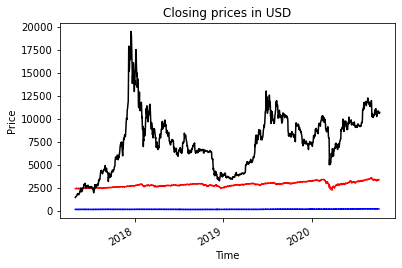

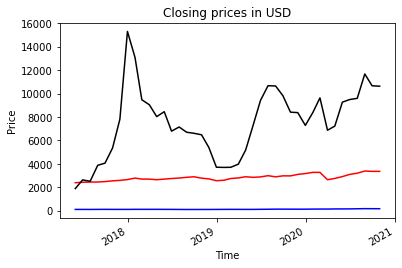

In [133]:
# Closing prices of only Gold, BTC and SP500
for data in price_data:
    ax = data.drop(columns=['XRP', 'ETH']).plot(legend=False, x_compat=True, color=['b', 'r', 'k '])
    ax.set_title("Closing prices in USD")
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.xaxis.set_major_locator(years_loc)
    ax.xaxis.set_major_formatter(years_fmt)
    plt.show()

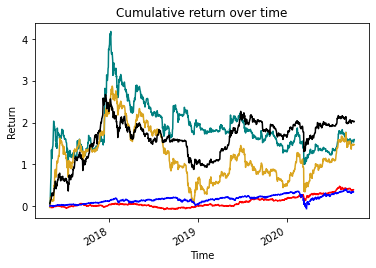

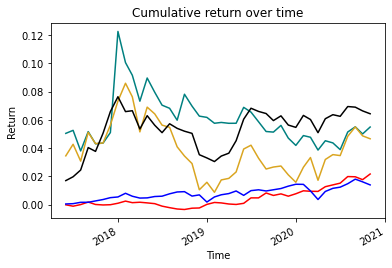

In [33]:
# Cumulative return over time
for freq, data in returns_data.items():
    ax = data.cumsum().plot(x_compat=True, legend=False, color=['r', 'teal', 'goldenrod', 'b', 'k'])
    ax.set_title("Cumulative return over time")
    ax.set_xlabel("Time")
    ax.set_ylabel("Return")
    ax.xaxis.set_major_locator(years_loc)
    ax.xaxis.set_major_formatter(years_fmt)
    plt.savefig("CumRet_" + freq + ".pdf")
    plt.show()

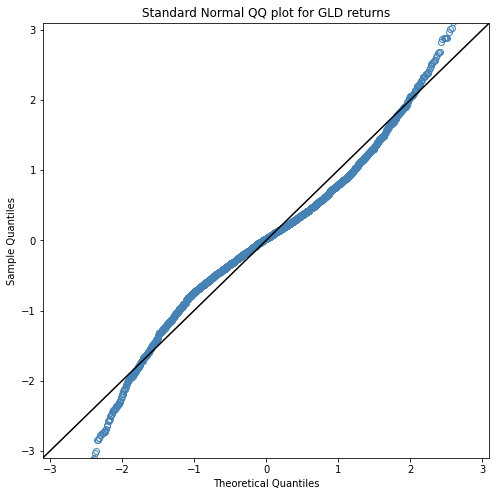

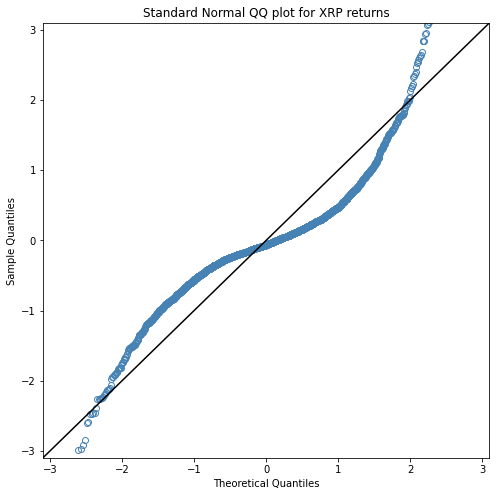

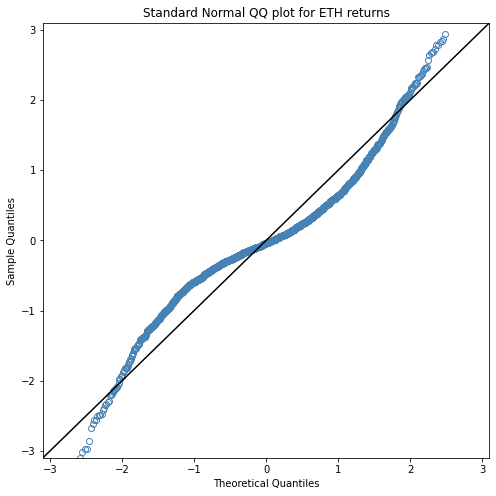

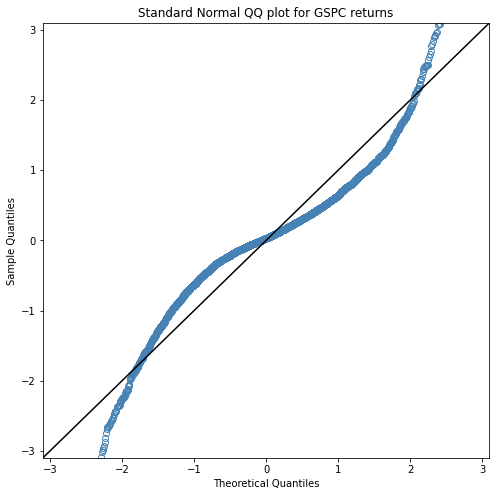

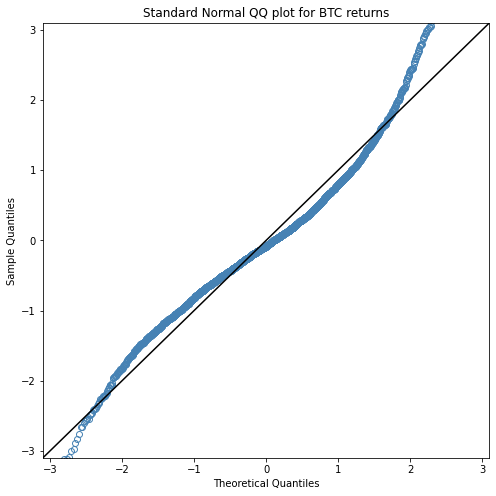

In [56]:
# Daily QQ Plots
import statsmodels.api as sm
import pandas as pd
from sklearn import preprocessing

stand_scaler = preprocessing.StandardScaler()
scaled = stand_scaler.fit_transform(returns.values)
scaled_returns = pd.DataFrame(scaled)

for i in range(5):
    plt.rcParams["figure.figsize"] = (8,8)
    qq = sm.qqplot(scaled_returns[i].dropna(), fit=True, color='steelblue', fillstyle='none')
    sm.qqline(qq.axes[0], line='45', fmt='k')
    plt.title("Standard Normal QQ plot for " + returns.drop("VIX", 1).columns.values[i] + " returns")
    plt.xlim(-3.1, 3.1)
    plt.ylim(-3.1, 3.1)
    plt.savefig("qqnorm_log_returns_" + returns.drop("VIX", 1).columns.values[i] + "_daily.pdf")
    plt.show()

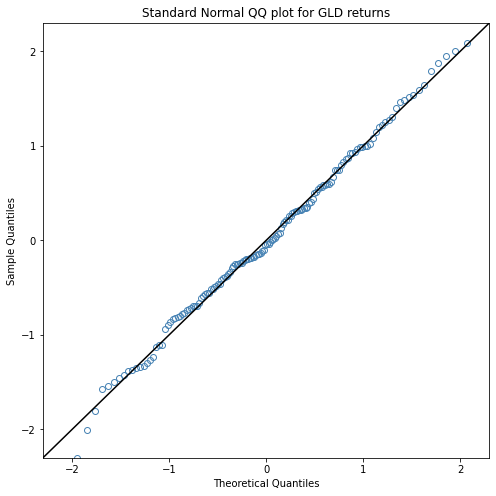

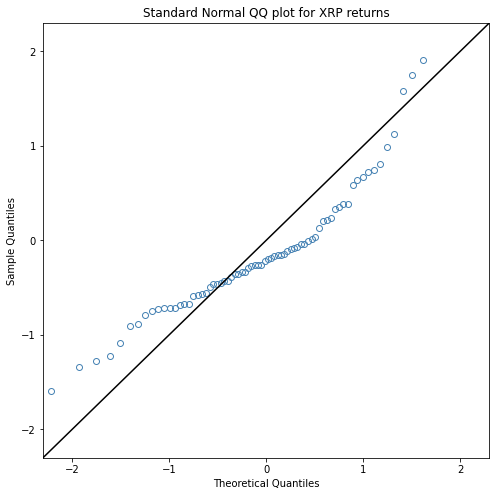

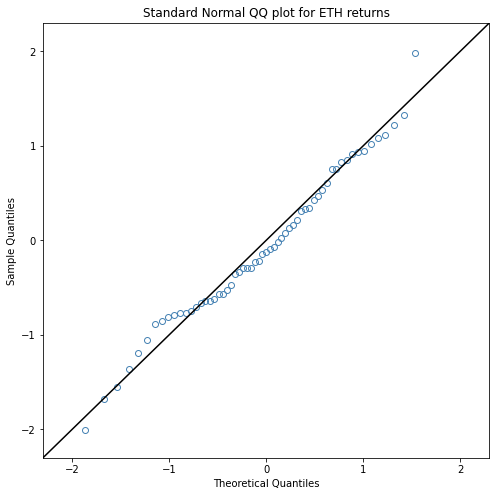

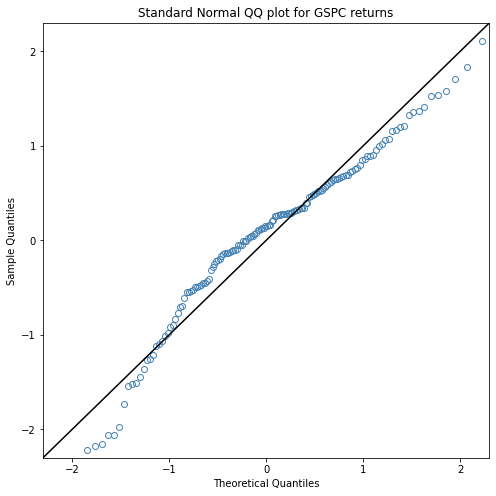

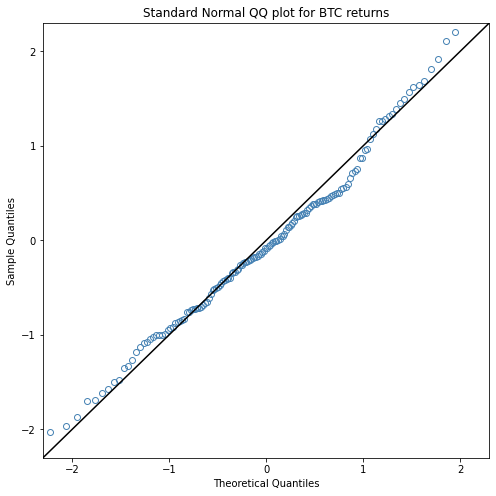

In [65]:
# Monthly QQ Plots
stand_scaler = preprocessing.StandardScaler()
scaled = stand_scaler.fit_transform(mreturns.values)
scaled_returns = pd.DataFrame(scaled)

for i in range(5):
    plt.rcParams["figure.figsize"] = (8,8)
    qq = sm.qqplot(scaled_returns[i].dropna(), fit=True, color='steelblue', fillstyle='none')
    sm.qqline(qq.axes[0], line='45', fmt='k')
    plt.title("Standard Normal QQ plot for " + returns.drop("VIX", 1).columns.values[i] + " returns")
    plt.xlim(-2.3, 2.3)
    plt.ylim(-2.3, 2.3)
    plt.savefig("qqnorm_log_returns_" + returns.drop("VIX", 1).columns.values[i] + "_monthly.pdf")
    plt.show()

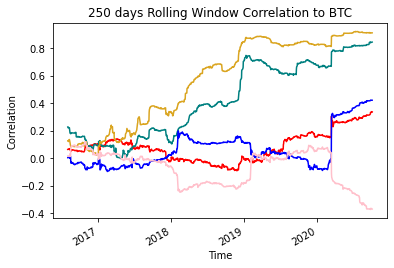

In [34]:
# Rolling window corr 250 days window
ax = returns.dropna().loc[:, returns.columns != 'BTC'].rolling(250).corr(returns.dropna()['BTC']).plot(legend=False, 
                                                                                                       color=['r', 'teal', 'goldenrod', 'b', 'pink'])
ax.set_title("250 days Rolling Window Correlation to BTC")
ax.set_xlabel("Time")
ax.set_ylabel("Correlation")
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig("RunCor_250_daily_ETH_GLD_GSPC_XRP.pdf")
plt.show()

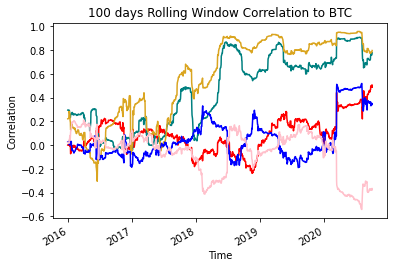

In [35]:
# Rolling window corr 100 days window
ax = (returns.dropna().loc[:, returns.columns != 'BTC'].rolling(100).corr(returns.dropna()['BTC'])).plot(legend=False, 
                                                                                                         color=['r', 'teal', 'goldenrod', 'b', 'pink'])
ax.set_title("100 days Rolling Window Correlation to BTC")
ax.set_xlabel("Time")
ax.set_ylabel("Correlation")
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig("RunCor_100_daily_ETH_GLD_GSPC_XRP.pdf")
plt.show()

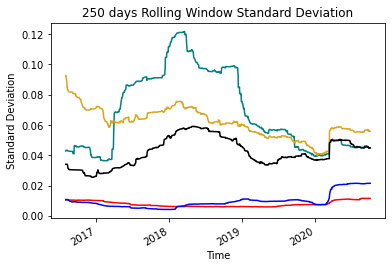

In [36]:
ax = returns.drop("VIX", 1).dropna().rolling(250).std().plot(legend=False,
                                                             color=['r', 'teal', 'goldenrod', 'b', 'k'])
ax.set_title("250 days Rolling Window Standard Deviation")
ax.set_xlabel("Time")
ax.set_ylabel("Standard Deviation")
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig("RunSD_250_daily_ETH_GLD_GSPC_XRP.pdf")
plt.show()

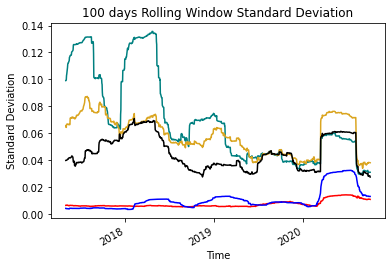

In [37]:
ax = returns.drop("VIX", 1).dropna().rolling(100).std()["2017-05-01":].plot(legend=False,
                                                                            color=['r', 'teal', 'goldenrod', 'b', 'k'])
ax.set_title("100 days Rolling Window Standard Deviation")
ax.set_xlabel("Time")
ax.set_ylabel("Standard Deviation")
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig("RunSD_100_daily_ETH_GLD_GSPC_XRP.pdf")
plt.show()

## Tables

In [51]:
# Parwise complete by default
for freq, data in returns_data_vix.items():
    data = data[['BTC','ETH','XRP','GLD','GSPC','VIX']]
    corr_df = data.corr().round(2)
#     print(corr_df.to_latex())
    text_file = open("correlation_" + freq + "_latex.txt", "w")
    text_file.write(corr_df.to_latex())
    text_file.close()

In [52]:
# Log return statistics, NAs excluded by default
for freq, data in returns_data.items():
    data = data[['BTC','ETH','XRP','GLD','GSPC']]
    mean = data.mean().round(4)
    std = data.std().round(4)
    skew = data.skew().round(4)
    kurt = data.kurtosis().round(4)
    minim = data.min().round(4)
    maxim = data.max().round(4)
    table = pd.DataFrame({'Mean': mean, 'Std. Dev.': std, 'Skewness': skew, 'e. Kurtosis': kurt, 
                          'Min.': minim, 'Max.': maxim})
    text_file = open("statistics_log_return_" + freq + "_latex.txt", "w")
    text_file.write(table.to_latex())
    text_file.close()

In [79]:
from scipy.stats import jarque_bera
# Jarque-Bera Test
for freq, data in returns_data_vix.items():
    data = data[['GLD','XRP','ETH','GSPC','VIX', 'BTC']]
    stats = []
    peas = []
    for column in data:
        result = jarque_bera(data[column].dropna())
        stats.append(round(result[0], 4))
        peas.append(round(result[1], 4))
    table = pd.DataFrame({'Jarque-Bera statistic': stats, 'P-value': peas})
    text_file = open("jarque_bera_log_return_" + freq + "_latex.txt", "w")
    text_file.write(table.to_latex())
    text_file.close()

In [101]:
from johansen_test import coint_johansen
# Implementation taken from: https://searchcode.com/codesearch/view/88477497/
# Johansen test
output = coint_johansen(returns_data["monthly"][["GLD", "BTC"]].dropna(), 0, 1)
coint_johansen(returns_data["daily"][["GLD", "BTC"]].dropna(), 0, 1, print_on_console=False)
coint_johansen(price_data[0][["GLD", "BTC"]].dropna(), 0, 1, False)
coint_johansen(price_data[1][["GLD", "BTC"]].dropna(), 0, 1, False)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 30.196 13.4294 15.4943 19.9349
r = 1 	 10.8523 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 19.3436 12.2971 14.2639 18.52
r = 1 	 10.8523 2.7055 3.8415 6.6349
--------------------------------------------------
eigenvectors:
 [[ 724.24694879 -532.24647484]
 [  82.75062682  157.1682008 ]]
--------------------------------------------------
eigenvalues:
 [0.38343444 0.23761851]
--------------------------------------------------


In [98]:
output.lr1

array([30.19595262, 10.85232812])